# **Entrega sesion cnn**   -   Juan Antonio Silva Luján

Partiendo de la cnn mnist entregada buscar un dataset de imágenes y ajustar una red convolucinal categórica usando:

> técnicas de data-aumentation.

> técnicas de dropout para controlar el overfiting

Hay varios ejemplos en lo ficheros adicionales entregados.
Intentar un ajuste lo más alto posible.
Guardar el modelo y los pesos.

Versión de KERAS: 2.2.5


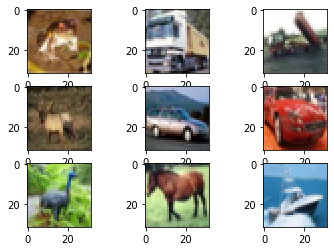

In [0]:
#Train a simple deep CNN on the CIFAR10 small images dataset.

from __future__ import print_function
import keras
print("Versión de KERAS: " + keras.__version__)
from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())
#Importo el dataset cifar10 
from keras.datasets import cifar10
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

# Cargo los datos del dataset cifar10 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
    
# show the plot
pyplot.show()

In [0]:
print("FORMATO DE LOS DATOS DE ENTRENAMIENTO:")     
print(X_train.shape)
print(y_train.shape)
print("FORMATO DE LOS DATOS DE TESTEO:")
print(X_test.shape)
print(y_test.shape)
print()
cifar_classes = ['AVIÓN', 'COCHE', 'AVE', 'GATO', 'CIERVO', 'PERRO', 'RANA', 'CABALLO', 'BARCO', 'CAMIÓN']
print('· Ejemplos de imágenes de entrenamiento con sus etiquetas: ' + str([x[0] for x in y_train[0:9]])) 
print('· Clases correspondientes a las etiquetas anteriores: ' + str([cifar_classes[x[0]] for x in y_train[0:9]]))

FORMATO DE LOS DATOS DE ENTRENAMIENTO:
(50000, 32, 32, 3)
(50000, 1)
FORMATO DE LOS DATOS DE TESTEO:
(10000, 32, 32, 3)
(10000, 1)

· Ejemplos de imágenes de entrenamiento con sus etiquetas: [6, 9, 9, 4, 1, 1, 2, 7, 8]
· Clases correspondientes a las etiquetas anteriores: ['RANA', 'CAMIÓN', 'CAMIÓN', 'CIERVO', 'COCHE', 'COCHE', 'AVE', 'CABALLO', 'BARCO']


In [0]:
import numpy as np
from keras.utils import to_categorical
#tRANSFORMACIÓN DE ÍNDICE DE ETIQUETAS EN VECTORES
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

#Transformación de imágenes de tamaño (32,32,3) a vectores de 3072 de dimensiones (32,32,3)
X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalización de valores de píxel con RANGO[0-1]
X_train /= 255
X_test /= 255

## Entrenamiento:

Se entrenará el modelo almacenando los valores y la pérdida de entrenamiento en un objeto llamado historial, para visualizar el proceso de entrenamiento más adelante. Se entrenará el modelo durante 15 épocas utilizando un tamaño de "paquete" de 32 y una división de validación de 0.2, es decir, que el 20% de los datos de entrenamiento se utilizarán como muestras de validación.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
 
model.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train,y_train, epochs=15, batch_size=32, verbose=2, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/15





 - 11s - loss: 1.8294 - acc: 0.3376 - val_loss: 1.7031 - val_acc: 0.4009
Epoch 2/15
 - 6s - loss: 1.6536 - acc: 0.4080 - val_loss: 1.6358 - val_acc: 0.4137
Epoch 3/15
 - 6s - loss: 1.5845 - acc: 0.4326 - val_loss: 1.5976 - val_acc: 0.4334
Epoch 4/15
 - 6s - loss: 1.5375 - acc: 0.4494 - val_loss: 1.5509 - val_acc: 0.4528
Epoch 5/15
 - 6s - loss: 1.5070 - acc: 0.4612 - val_loss: 1.5563 - val_acc: 0.4476
Epoch 6/15
 - 6s - loss: 1.4792 - acc: 0.4681 - val_loss: 1.5365 - val_acc: 0.4544
Epoch 7/15
 - 6s - loss: 1.4545 - acc: 0.4814 - val_loss: 1.5240 - val_acc: 0.4639
Epoch 8/15
 - 6s - loss: 1.4299 - acc: 0.4846 - val_loss: 1.5752 - val_acc: 0.4459
Epoch 9/15
 - 6s - loss: 1.4075 - acc: 0.4953 - val_loss: 1.5143 - val_acc: 0.4701
Epoch 10/15
 - 6s - loss: 1.3897 - acc: 0.4992 - val_loss: 1.5433 - val_acc: 0.4648
Epoch 11/15
 - 6

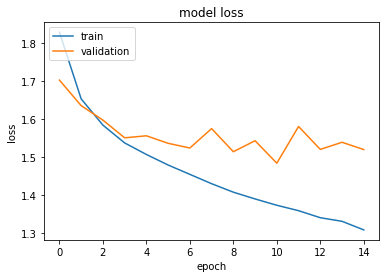

['loss', 'acc', 1.5064247535705566, 0.4795]


In [0]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()
#Evaluación de los resultados obtenidos y representación gráfica
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print(model.metrics_names + score)

# DROPTOUT

---



El DROPOUT es una técnica que funciona en una capa de red neuronal enmascarando un subconjunto de forma aleatoria de sus salidas siendo igual a 0. Para cada entrada con probabilidad P.
El enmascaramiento evita la propagación hacia atrás del gradiente. el método selecciona un subconjunto aleatorio de la red neuronal para entrenar cualquier ejemplo particular.



In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalización de valores de píxel con RANGO[0-1]
X_train /= 255
X_test /= 255

print("FORMATO DE LOS DATOS DE ENTRENAMIENTO:")     
print(X_train.shape)
print(y_train.shape)
print("FORMATO DE LOS DATOS DE TESTEO:")
print(X_test.shape)
print(y_test.shape)

FORMATO DE LOS DATOS DE ENTRENAMIENTO:
(50000, 32, 32, 3)
(50000, 10)
FORMATO DE LOS DATOS DE TESTEO:
(10000, 32, 32, 3)
(10000, 10)


In [0]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Añado la capa DROPOUT
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))

#Añado la capa DROPOUT
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary()



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               1605888   
___

In [0]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 15s - loss: 1.7190 - acc: 0.3750 - val_loss: 1.3686 - val_acc: 0.5132
Epoch 2/15
 - 12s - loss: 1.3562 - acc: 0.5122 - val_loss: 1.2161 - val_acc: 0.5750
Epoch 3/15
 - 12s - loss: 1.2048 - acc: 0.5724 - val_loss: 1.0714 - val_acc: 0.6257
Epoch 4/15
 - 12s - loss: 1.0897 - acc: 0.6155 - val_loss: 1.0377 - val_acc: 0.6360
Epoch 5/15
 - 12s - loss: 1.0074 - acc: 0.6442 - val_loss: 1.0029 - val_acc: 0.6448
Epoch 6/15
 - 12s - loss: 0.9278 - acc: 0.6743 - val_loss: 1.0301 - val_acc: 0.6424
Epoch 7/15
 - 12s - loss: 0.8747 - acc: 0.6912 - val_loss: 0.9974 - val_acc: 0.6600
Epoch 8/15
 - 12s - loss: 0.8157 - acc: 0.7129 - val_loss: 0.9628 - val_acc: 0.6666
Epoch 9/15
 - 12s - loss: 0.7747 - acc: 0.7267 - val_loss: 1.0015 - val_acc: 0.6673
Epoch 10/15
 - 12s - loss: 0.7330 - acc: 0.7414 - val_loss: 0.9604 - val_acc: 0.6788
Epoch 11/15
 - 12s - loss: 0.6976 - acc: 0.7530 - val_loss: 0.9932 - val_acc: 0.6770
Epoch 12/15
 - 12s - los

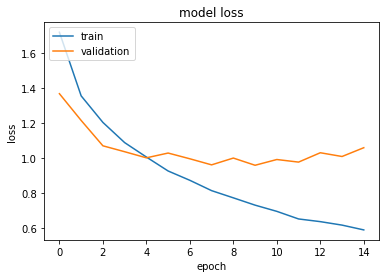

['loss', 'acc', 1.0578224396705627, 0.6704]


In [0]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()
#Evaluación de los resultados obtenidos y representación gráfica
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print(model.metrics_names + score)

# DATA AUMENTATION


---



In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        width_shift_range=0.1,   #Modificación aleatoria de imágenes horizontalmente
        height_shift_range=0.1,  #Modificación aleatoria de imágenes verticalmente
        horizontal_flip=True)    # Voltea las imagenes horizontalmente

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train[:40000], y_train[:40000], batch_size=32)
validation_generator = validation_datagen.flow(X_train[40000:], y_train[40000:], batch_size=32)

In [0]:
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

adam = Adam(lr=0.0006, beta_1=0.9, beta_2=0.999, decay=0.0)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

In [0]:
history = model.fit_generator(train_generator,    
                    validation_data=validation_generator,
                    validation_steps=len(X_train[40000:]) / 32,
                    steps_per_epoch=len(X_train[:40000]) / 32,
                    epochs=15,
                    verbose=2)

Epoch 1/15
 - 30s - loss: 1.6480 - acc: 0.3954 - val_loss: 1.3381 - val_acc: 0.5271
Epoch 2/15
 - 29s - loss: 1.3782 - acc: 0.5057 - val_loss: 1.1367 - val_acc: 0.5996
Epoch 3/15
 - 29s - loss: 1.2691 - acc: 0.5493 - val_loss: 1.0648 - val_acc: 0.6279
Epoch 4/15
 - 29s - loss: 1.2101 - acc: 0.5742 - val_loss: 1.0165 - val_acc: 0.6430
Epoch 5/15
 - 29s - loss: 1.1659 - acc: 0.5872 - val_loss: 0.9726 - val_acc: 0.6603
Epoch 6/15
 - 29s - loss: 1.1249 - acc: 0.6031 - val_loss: 0.9679 - val_acc: 0.6645
Epoch 7/15
 - 29s - loss: 1.1059 - acc: 0.6083 - val_loss: 0.9318 - val_acc: 0.6780
Epoch 8/15
 - 29s - loss: 1.0787 - acc: 0.6218 - val_loss: 0.9560 - val_acc: 0.6624
Epoch 9/15
 - 29s - loss: 1.0602 - acc: 0.6263 - val_loss: 0.8568 - val_acc: 0.7012
Epoch 10/15
 - 29s - loss: 1.0393 - acc: 0.6344 - val_loss: 0.8728 - val_acc: 0.7021
Epoch 11/15


In [0]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()
#Evaluación de los resultados obtenidos y representación gráfica
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print(model.metrics_names + score)

In [0]:
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save('modelSAVED.h5')